# Data extraction

![texto alternativo](https://worldview.stratfor.com/sites/default/files/styles/article_full/public/cryptocurrency-gulf-display-shutterstock-1028639176.png?itok=K36RQG5A.jpg)

## Extracting (web scraping) daily data from top 200 cryptocurrencies available at  https://coinmarketcap.com/coins/ but also you can find more datasets with data by hour at https://www.cryptodatadownload.com/data/

All libraries should be imported first

In [1]:
# ► First libs

import plotly.express as px 
import pandas as pd
import re

# ► More libs for the function

import datetime 
import csv

In [ ]:
# ► For arima model


In [2]:
# ► Scraping main table wit pandas

url = 'https://coinmarketcap.com/coins/views/all/'
df = pd.read_html(url)[2]
df.head()

,Rank,Name,Symbol,Market Cap,Price,Circulating Supply,Volume (24h),% 1h,% 24h,% 7d,Unnamed: 10
0,1,Bitcoin,BTC,"$212,505,510,411","$11,507.06","18,467,400 BTC","$24,670,704,133",0.22%,-2.85%,-2.89%,NaN
1,2,Ethereum,ETH,"$43,473,516,695",$387.19,"112,279,091 ETH","$12,277,743,198",0.99%,-6.37%,-11.80%,NaN
2,3,XRP,XRP,"$12,486,095,429",$0.277823,"44,942,589,751 XRP *","$1,891,569,554",0.32%,-4.22%,-7.78%,NaN
3,4,Bitcoin Cash,BCH,"$5,221,181,592",$282.28,"18,496,313 BCH","$1,758,877,290",0.73%,-3.67%,-4.86%,NaN
4,5,Litecoin,LTC,"$3,853,646,483",$59.02,"65,290,569 LTC","$3,002,494,111",0.62%,-5.26%,2.85%,NaN


In [3]:
# ► Getting rid of '$,' simbols

df.Price = df['Price'].apply(lambda x: float(re.sub('([$,]*)','',x)))
df.sort_values(by=['Price'], inplace=True, ascending=False)

In [4]:
# ► Below Bitcoin is omitted because its price is too high to appreciate the rest of the coins

fig = px.bar(df[1:], y='Price', x='Name', text='Name')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(template='seaborn', title='Coins available for scraping')
fig.show()

In [5]:
coins_available = list(df.Name)

In [6]:
# ► Repacing ' ' and '.' for '-' and deleting '[]#'  

coins_available = [re.sub('([\s+.])','-',coin.lower()).replace('[','').replace(']','').replace('#','') for coin in coins_available]

In [7]:
print(coins_available)

['bitcoin', 'ethereum', 'bitcoin-cash', 'bitcoin-sv', 'monero', 'dash', 'bitcoinpos', 'zcash', 'unobtanium', 'litecoin', 'bonorum', 'obyte', 'binance-coin', 'salus', 'counos-x', 'decred', 'neo', 'kusama', 'energy-web-token', 'bitcoin-gold', 'largo-coin', 'newyork-exchange', 'horizen', 'ethereum-classic', 'zcoin', 'mimblewimblecoin', 'chainx', 'cosmos', 'counos-coin', 'platincoin', 'bitcoinhd', 'ddkoin', 'qtum', 'tezos', 'eos', 'waves', 'ghostprism', 'solana', 'btse', 'vitae', 'elastos', 'celo', 'zenon', 'zynecoin', 'monacoin', 'factom', 'lisk', 'hypercash', 'cryptonex', 'energi', 'serum', 'blocknet', 'haven-protocol', 'nano', 'deviantcoin', 'stakecubecoin', 'tomochain', 'dero', 'komodo', 'polis', 'ontology', 'bitcoin-diamond', 'bhpcoin', 'gxchain', 'skycoin', 'ergo', 'baer-chain', 'darma-cash', 'neblio', 'stratis', 'insolar', 'ouroboros', 'fusion', 'aeon', 'bitcoin-2', 'icon', 'grin', 'algorand', 'nebulas', 'beam', 'loki', 'aidos-kuneen', 'namecoin', 'pivx', 'ark', 'nuls', 'stakenet', 

## Function to obtain some data coins like 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'.



In [8]:
# ► Function to extract data

def get_data(coins_available):
 
  # ► User types a number

  print(coins_available)
  coin_name = input('Type a valid coin name: ').lower()

  while True:

    if coin_name not in coins_available:
      print('Coin name should not contain spaces instead use "-" and type all in lowercase')
      coin_name = input('Type again a valid coin name: ').lower()
    else:
      break
  
  # ► Scrapping the coin name

  today = datetime.date.today()  # todays date
  mktcap_page = 'https://coinmarketcap.com/currencies/'+ coin_name +'/historical-data/?start=20130428&amp;end='+"{:%Y%m%d}".format(today)
  full_data = pd.read_html(mktcap_page)[2]
  full_data.rename(columns={'Open*': 'Open', 'Close**': 'Close'}, inplace=True)

  # ► This function replaces ',' for nothing and then changes data type from object to float

  def obj_to_num(df,cols):
      
      def obj_to_num(row):
          if ',' in str(row):
            row = row.replace(',','')
            return float(row)
          else:
            return float(row)

      for col in cols:     
          df[col] = df[col].apply(obj_to_num) 

      return df

  # ► This function changes data column type from object to timestamp[ns] and also can changes other columns to float 

  def prepare_data(file):
  
    columns = ['Open','High','Low','Close','Volume','Market Cap']
    file['Date'] = pd.to_datetime(file['Date'])
    num_data = obj_to_num(file,columns)

    return num_data

  return prepare_data(full_data)


## Coin exploration (Ethereum in this case)

You can type any coin (available in the list) to be analized

In [9]:
# ► Type the coin name you want

my_coin = get_data(coins_available)

['bitcoin', 'ethereum', 'bitcoin-cash', 'bitcoin-sv', 'monero', 'dash', 'bitcoinpos', 'zcash', 'unobtanium', 'litecoin', 'bonorum', 'obyte', 'binance-coin', 'salus', 'counos-x', 'decred', 'neo', 'kusama', 'energy-web-token', 'bitcoin-gold', 'largo-coin', 'newyork-exchange', 'horizen', 'ethereum-classic', 'zcoin', 'mimblewimblecoin', 'chainx', 'cosmos', 'counos-coin', 'platincoin', 'bitcoinhd', 'ddkoin', 'qtum', 'tezos', 'eos', 'waves', 'ghostprism', 'solana', 'btse', 'vitae', 'elastos', 'celo', 'zenon', 'zynecoin', 'monacoin', 'factom', 'lisk', 'hypercash', 'cryptonex', 'energi', 'serum', 'blocknet', 'haven-protocol', 'nano', 'deviantcoin', 'stakecubecoin', 'tomochain', 'dero', 'komodo', 'polis', 'ontology', 'bitcoin-diamond', 'bhpcoin', 'gxchain', 'skycoin', 'ergo', 'baer-chain', 'darma-cash', 'neblio', 'stratis', 'insolar', 'ouroboros', 'fusion', 'aeon', 'bitcoin-2', 'icon', 'grin', 'algorand', 'nebulas', 'beam', 'loki', 'aidos-kuneen', 'namecoin', 'pivx', 'ark', 'nuls', 'stakenet', 

In [10]:
my_coin.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2020-08-21,416.15,418.64,387.44,389.13,1.178180e+10,4.369032e+10
1,2020-08-20,406.76,418.73,404.03,416.44,1.004303e+10,4.675136e+10
2,2020-08-19,423.74,427.02,396.68,406.46,1.313739e+10,4.562586e+10
3,2020-08-18,429.67,432.58,419.67,423.67,1.197898e+10,4.755141e+10
4,2020-08-17,433.97,442.73,422.65,429.53,1.322709e+10,4.820343e+10


In [11]:
my_coin.dtypes

Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume               float64
Market Cap           float64
dtype: object

In [12]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=my_coin['Date'], y=my_coin['Open'],
                    mode='lines',
                    name='Open'))
fig.add_trace(go.Scatter(x=my_coin['Date'], y=my_coin['High'],
                    mode='lines',
                    name='High'))
fig.add_trace(go.Scatter(x=my_coin['Date'], y=my_coin['Low'],
                    mode='lines',
                    name='Low'))
fig.add_trace(go.Scatter(x=my_coin['Date'], y=my_coin['Close'],
                    mode='lines',
                    name='Close'))

#fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(title="Coin behavior from its beginning, price in USD")

fig.show()

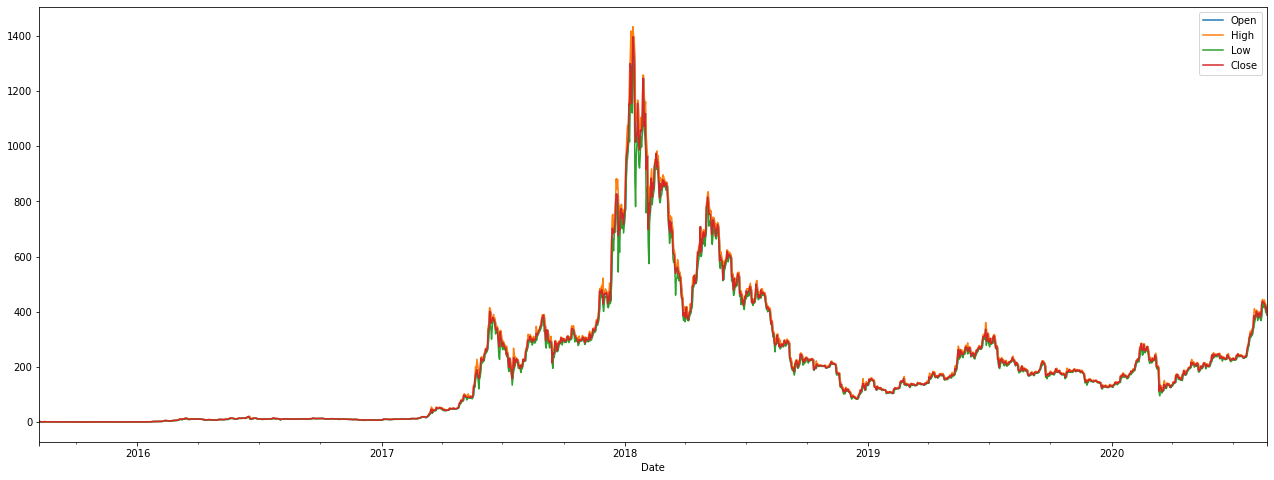

In [13]:
my_coin_graph = my_coin.set_index('Date') 
_ = my_coin_graph[['Open','High','Low','Close']].plot(figsize=(22, 8))

In [14]:
# ► Saving data to csv
my_coin.to_csv('my_coin_daily_data.csv')

## Models

### FbProphet

In [15]:
'''# ► Prophet

import fbprophet
import matplotlib.pyplot as plt'''


In [16]:
# ► Data after 2017-01-01

my_coin_high = my_coin[['High','Date']][my_coin.Date >= '2017-01-01']

In [17]:
# ► Model won't see last 10 days to be compared

my_coin_high_p = my_coin_high[10:]

In [18]:
# ► Renaming columns for Prophet

my_coin_high_p = my_coin_high_p.rename(columns = {'Date':'ds','High':'y'})

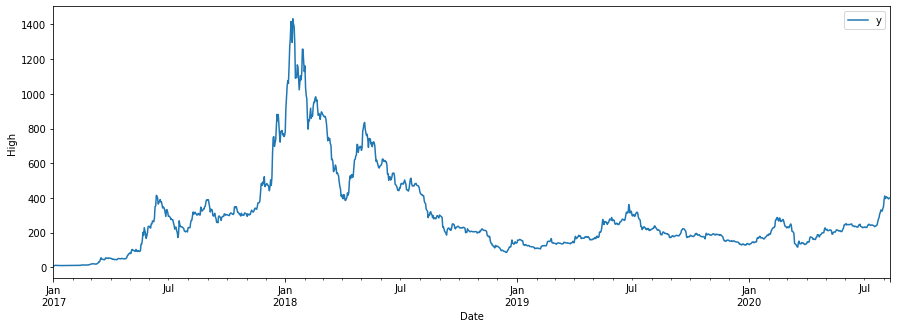

In [19]:
# ► Plot

ax = my_coin_high_p.set_index('ds').plot(figsize=(15, 5))
ax.set_ylabel('High')
ax.set_xlabel('Date')

plt.show()

In [20]:
# ► setting this hyperparameter to 0.8  https://facebook.github.io/prophet/docs/trend_changepoints.html#adjusting-trend-flexibility
# ► 1.1 = mse(2805.25), 0.8 = mse(2857.13), 1.2 = mse(3015.23), 0.75 = mse(3038.22), 0.9 = mse(3039.19), 0.5 = mse(3182.94)   

m = fbprophet.Prophet(changepoint_prior_scale=1.1)

In [21]:
m.fit(my_coin_high_p)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [22]:
future = m.make_future_dataframe(periods=30)

In [23]:
forecast_p = m.predict(future)

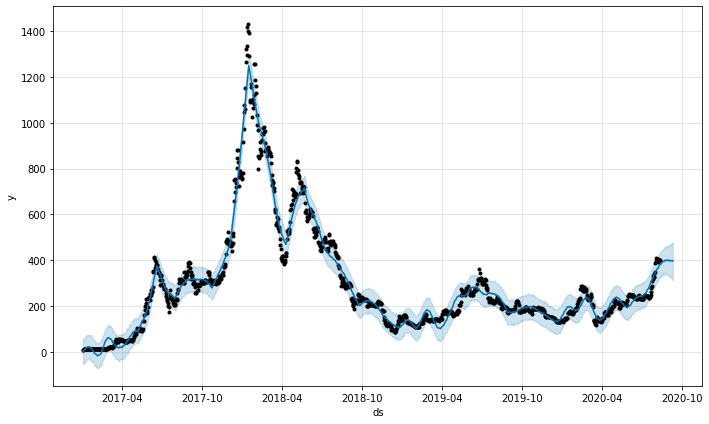

In [24]:
m.plot(forecast_p);

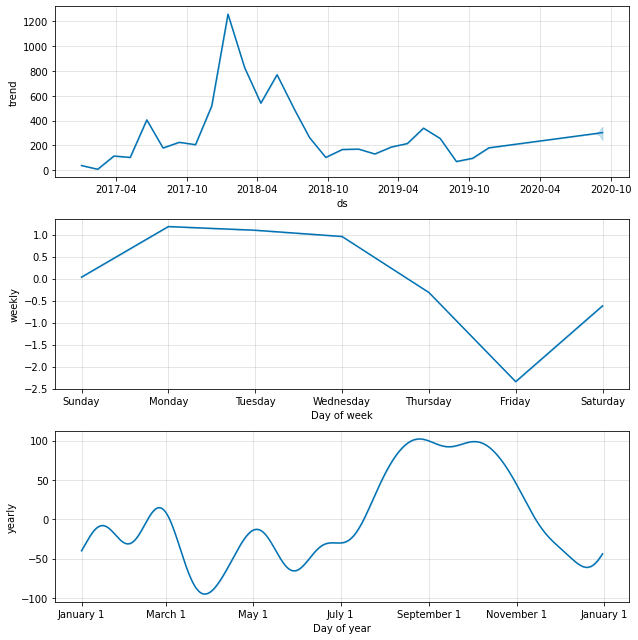

In [25]:
m.plot_components(forecast_p);

In [26]:
# ► predictions and real data

my_coin_inverse = my_coin_high.copy() 
my_coin_inverse.High = my_coin_inverse.High.values[::-1]                        # To change value orders from the original data
my_coin_forecast = pd.concat([forecast_p['ds'],my_coin_inverse['High'],forecast_p['yhat']], axis=1,keys=['date','high','prophet_high'])

In [27]:
# ► The model didn't see this high values

my_coin_forecast[-30:-20]

,date,high,prophet_high
1319,2020-08-12,391.31,381.479722
1320,2020-08-13,432.90,382.561945
1321,2020-08-14,444.58,382.738260
1322,2020-08-15,441.75,386.510375
1323,2020-08-16,436.27,389.056170
1324,2020-08-17,442.73,391.940633
1325,2020-08-18,432.58,393.431902
1326,2020-08-19,427.02,394.703238
1327,2020-08-20,418.73,394.682418
1328,2020-08-21,418.64,393.745245


### Arima

In [28]:
# ► Libraries

!pip install pmdarima
from pmdarima.arima import auto_arima
from scipy import stats
from itertools import product
import warnings
import statsmodels.api as sm

     |████████████████████████████████| 1.5MB 2.8MB/s 
     |████████████████████████████████| 8.7MB 16.4MB/s 
     |████████████████████████████████| 2.1MB 50.9MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


In [29]:
# ► Create a copy with values in reverse

my_coin_high_a = (my_coin_high[10:].copy()).set_index('Date').iloc[::-1]


In [30]:
my_coin_high_a.head()

,High
Date,
2017-01-01,8.47
2017-01-02,8.44
2017-01-03,10.00
2017-01-04,11.28
2017-01-05,11.89


In [31]:
# Arima tunning hyperparameters
# Initial approximation of parameters

Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(my_coin_high_a.High, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12),enforce_stationarity=False,
                                            enforce_invertibility=False).fit(disp=-1)
    except ValueError:
        #print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [32]:
forecast_arima = pd.DataFrame(best_model.predict(start=0, end=len(my_coin_forecast)-1))

In [33]:
forecast_arima = forecast_arima.rename(columns = {0:'arima_high'})

In [34]:
forecast_arima

,arima_high
2017-01-01,0.000000
2017-01-02,9.673372
2017-01-03,9.378112
2017-01-04,10.708442
2017-01-05,12.067874
...,...
2020-09-06,403.574262
2020-09-07,402.740361
2020-09-08,402.396937
2020-09-09,400.728961


In [35]:
# ► Joining data frames

my_coin_forecast_cp = pd.concat([my_coin_forecast.set_index('date'),forecast_arima], axis = 1, sort = False)

In [36]:
# ► Comparing 10 unseen data by both models

my_coin_forecast_cp[-30:-20]

,high,prophet_high,arima_high
2020-08-12,391.31,381.479722,397.446625
2020-08-13,432.90,382.561945,397.201799
2020-08-14,444.58,382.738260,395.584980
2020-08-15,441.75,386.510375,395.647423
2020-08-16,436.27,389.056170,393.732975
2020-08-17,442.73,391.940633,393.162319
2020-08-18,432.58,393.431902,395.200992
2020-08-19,427.02,394.703238,398.881503
2020-08-20,418.73,394.682418,398.725678
2020-08-21,418.64,393.745245,399.650761


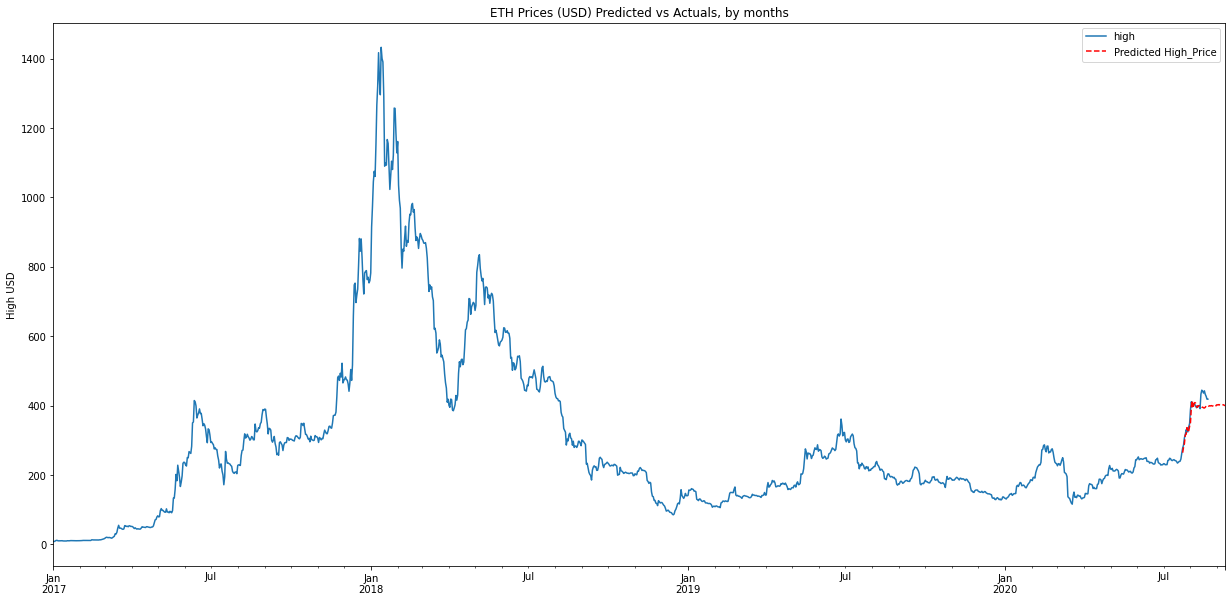

In [37]:
plt.figure(figsize=(21,10))
my_coin_forecast_cp.high.plot()
my_coin_forecast_cp.arima_high[-50:].plot(color='r', ls='--', label='Predicted High_Price')
plt.legend()
plt.title('ETH Prices (USD) Predicted vs Actuals, by months')
plt.ylabel('High USD')
plt.show()

### PyCaret

In [38]:
!pip install pycaret==2.0

     |████████████████████████████████| 256kB 2.8MB/s 
     |████████████████████████████████| 65.9MB 52kB/s 
     |████████████████████████████████| 61kB 6.2MB/s 
     |████████████████████████████████| 6.8MB 44.7MB/s 
     |████████████████████████████████| 266kB 42.2MB/s 
     |████████████████████████████████| 1.6MB 41.6MB/s 
     |████████████████████████████████| 12.4MB 29.2MB/s 
     |████████████████████████████████| 266kB 40.7MB/s 
     |████████████████████████████████| 102kB 9.4MB/s 
     |████████████████████████████████| 1.2MB 24.6MB/s 
     |████████████████████████████████| 235kB 11.8MB/s 
     |████████████████████████████████| 552kB 36.5MB/s 
     |████████████████████████████████| 6.0MB 35.1MB/s 
     |████████████████████████████████| 1.1MB 43.9MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 81kB 9.7MB/s 
     |████████████████████████████████| 

In [4]:
from pycaret.regression import *

In [5]:
import pandas as pd
#my_coin = pd.read_csv('my_coin_daily_data.csv')
#my_coin['Date'] = pd.to_datetime(my_coin['Date'])

In [10]:
my_coin_high_py = my_coin[['Date','High']]

In [11]:
my_coin_high_py = (my_coin_high_py[10:].copy()).iloc[::-1]
my_coin_high_py.head()

,Date,High
1839,2015-08-07,3.540000
1838,2015-08-08,2.800000
1837,2015-08-09,0.879810
1836,2015-08-10,0.729854
1835,2015-08-11,1.130000


In [12]:
exp_reg = setup(data = my_coin_high_py, target = 'High')

 
Setup Succesfully Completed.


,Description,Value
0,session_id,720
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1830, 2)"
4,Missing Values,False
5,Numeric Features,0
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [13]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Lasso Regression,162.1720,52855.1992,228.7987,0.0104,2.0289,22.6530,0.0063
1,Bayesian Ridge,161.8698,52881.0712,228.8511,0.0101,2.0329,23.0569,0.0094
2,TheilSen Regressor,156.7838,53245.0492,229.3944,0.0077,1.9884,20.7558,2.3173
3,Ridge Regression,164.0596,52981.9954,229.1313,0.0063,2.0201,21.8588,0.0058
4,Least Angle Regression,164.1680,52997.5104,229.1678,0.0060,2.0196,21.8139,0.0106
5,Linear Regression,163.9120,53139.3851,229.4227,0.0043,2.0142,21.6086,0.0067
6,Elastic Net,162.2461,54056.6133,231.3133,-0.0099,2.0591,25.6649,0.0051
7,Lasso Least Angle Regression,163.4525,54601.8910,232.4842,-0.0202,2.0648,26.2643,0.0050
8,Support Vector Machine,155.5399,55491.9152,233.9044,-0.0289,1.9783,21.6077,0.1375
9,Orthogonal Matching Pursuit,165.5997,54946.9168,233.3084,-0.0293,2.0606,25.1853,0.0054


In [14]:
# ► Creating an ensemble meta-estimator that fits a base regressor on the whole dataset

blender_top3 = blend_models(compare_models(n_select = 3))

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,161.0457,51161.1204,226.1882,0.0124,2.1151,23.5511
1,181.0688,76171.3007,275.9915,-0.0211,1.8229,17.3278
2,163.8683,56905.5465,238.5488,-0.0184,1.9150,21.4488
3,154.0506,52423.6876,228.9622,0.0154,1.8829,19.6136
4,167.4895,63527.0525,252.0457,0.0056,1.9262,18.6634
5,149.1663,48505.9748,220.2407,0.0770,2.0591,22.9766
6,151.4527,47263.6512,217.4020,0.0496,2.0692,25.8362
7,158.1128,42377.4661,205.8579,-0.0292,2.2483,27.4052
8,147.5160,34707.1449,186.2985,-0.0369,2.1506,25.0249
9,166.7068,55822.3490,236.2675,0.0611,1.9805,19.6914


In [16]:
# ► It does not plot Hyperparams cause is blended model  

evaluate_model(blender_top3)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
# ► Stage of predictions

lr_pred_new = predict_model(lr, data = new_data)

In [ ]:
# ► In the last step to compare models, not before cause there are issues with sklearn versions for pmdarima and pycaret 
'''from sklearn.metrics import mean_squared_error as mse
print(mse(my_coin_forecast_cp.high[-30:-20],my_coin_forecast_cp.arima_high[-30:-20]))
print(mse(my_coin_forecast.high[-30:-20],my_coin_forecast.prophet_high[-30:-20]))'''